In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("heart.csv")

print("Basic information about the dataset:")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

print("\nData types:")
print(df.dtypes)


Basic information about the dataset:
Rows: 1025
Columns: 14

Data types:
age         float64
sex         float64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal        float64
target        int64
dtype: object


In [33]:
print("\n Basic statistics:")
print(df.describe())

print("\n Basic information:")
df.info()

print("\n First five rows:")
df.head()


 Basic statistics:
               age          sex           cp     trestbps         chol          fbs      restecg      thalach        exang      oldpeak        slope           ca         thal       target
count  1024.000000  1024.000000  1025.000000  1023.000000  1023.000000  1025.000000  1025.000000  1025.000000  1025.000000  1024.000000  1025.000000  1025.000000  1024.000000  1025.000000
mean     54.434570     0.695312     0.942439   131.580645   246.035191     0.149268     0.529756   149.114146     0.336585     1.071777     1.385366     0.754146     2.324219     0.513171
std       9.076713     0.460500     1.029641    17.511000    51.634523     0.356527     0.527878    23.005724     0.472772     1.175597     0.617755     1.030798     0.620881     0.500070
min      29.000000     0.000000     0.000000    94.000000   126.000000     0.000000     0.000000    71.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
25%      48.000000     0.000000     0.00

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0,125.0,212.0,0,1,168,0,1.0,2,2,3.0,0
1,53.0,1.0,0,140.0,203.0,1,0,155,1,3.1,0,0,3.0,0
2,70.0,1.0,0,145.0,174.0,0,1,125,1,2.6,0,0,3.0,0
3,61.0,1.0,0,148.0,203.0,0,1,161,0,0.0,2,1,3.0,0
4,62.0,0.0,0,138.0,294.0,1,1,106,0,1.9,1,3,2.0,0



Correlations:


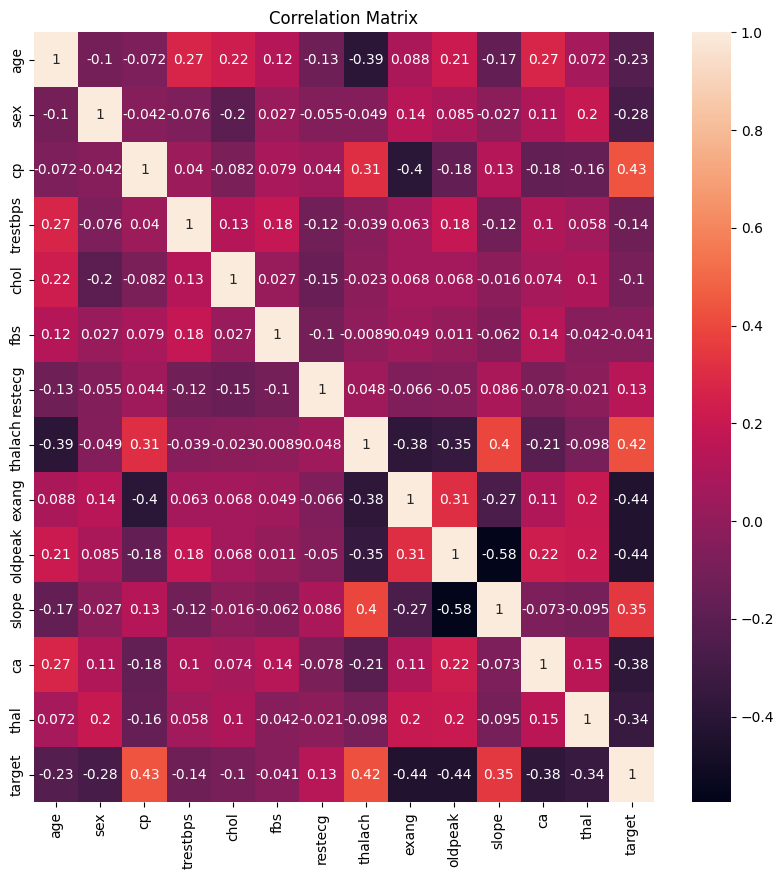

In [34]:
print("\nCorrelations:")
plt.figure(figsize=(10, 10))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True)
plt.show()




In [35]:
print("\nMissing values:")
print(df.isnull().sum())

print("\nUnique values:")
df.nunique()


Missing values:
age         1
sex         1
cp          0
trestbps    2
chol        2
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     1
slope       0
ca          0
thal        1
target      0
dtype: int64

Unique values:


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

duplicate_count = df.duplicated().sum()
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(f"\nNumber of duplicate rows in the data: {duplicate_count}")
if duplicate_count > 0:
    print("List of duplicate rows:")
    duplicate_rows = df[df.duplicated()].sort_values(by=df.columns.tolist())
    print(duplicate_rows.head(20))



Number of duplicate rows in the data: 715
List of duplicate rows:
      age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
64   29.0  1.0   1     130.0  204.0    0        0      202      0      0.0      2   0   2.0       1
118  29.0  1.0   1     130.0  204.0    0        0      202      0      0.0      2   0   2.0       1
668  29.0  1.0   1     130.0  204.0    0        0      202      0      0.0      2   0   2.0       1
15   34.0  0.0   1     118.0  210.0    0        1      192      0      0.7      2   0   2.0       1
779  34.0  0.0   1     118.0  210.0    0        1      192      0      0.7      2   0   2.0       1
201  34.0  1.0   3     118.0  182.0    0        0      174      0      0.0      2   0   2.0       1
572  34.0  1.0   3     118.0  182.0    0        0      174      0      0.0      2   0   2.0       1
501  35.0  0.0   0     138.0  183.0    0        1      182      0      1.4      2   0   2.0       1
841  35.0  0.0   0     138.0  183

In [37]:
df_fixed = df.copy()
missing = df_fixed.isnull().sum()
print("\nMissing values:")
print(missing)
cols_with_missing_values = missing[missing > 0].index.tolist()
print("\nColumns with missing values:")
print(cols_with_missing_values)

for column in cols_with_missing_values:
    median = df_fixed[column].median()
    df_fixed[column] = df_fixed[column].fillna(df_fixed[column].median())

print("\n-----------------------------\nAfter repair")
print("Missing values:")
print(df_fixed.isnull().sum())




Missing values:
age         1
sex         1
cp          0
trestbps    2
chol        2
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     1
slope       0
ca          0
thal        1
target      0
dtype: int64

Columns with missing values:
['age', 'sex', 'trestbps', 'chol', 'oldpeak', 'thal']

-----------------------------
After repair
Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [38]:
from sklearn.preprocessing import MinMaxScaler

cols_to_norm = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'thal']
scaler = MinMaxScaler()
df_fixed[cols_to_norm] = scaler.fit_transform(df_fixed[cols_to_norm])
print(df_fixed[cols_to_norm].describe())
df_fixed.head(5)


               age     trestbps         chol      thalach      oldpeak        slope         thal
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000
mean      0.529919     0.354505     0.274026     0.596291     0.172825     0.692683     0.774634
std       0.189009     0.165038     0.117773     0.175616     0.189525     0.308878     0.206887
min       0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.395833     0.245283     0.194064     0.465649     0.000000     0.500000     0.666667
50%       0.562500     0.339623     0.260274     0.618321     0.129032     0.500000     0.666667
75%       0.666667     0.433962     0.340183     0.725191     0.290323     1.000000     1.000000
max       1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0,0.292453,0.196347,0,1,0.740458,0,0.161290,1.0,2,1.000000,0
1,0.500000,1.0,0,0.433962,0.175799,1,0,0.641221,1,0.500000,0.0,0,1.000000,0
2,0.854167,1.0,0,0.481132,0.109589,0,1,0.412214,1,0.419355,0.0,0,1.000000,0
3,0.666667,1.0,0,0.509434,0.175799,0,1,0.687023,0,0.000000,1.0,1,1.000000,0
4,0.687500,0.0,0,0.415094,0.383562,1,1,0.267176,0,0.306452,0.5,3,0.666667,0


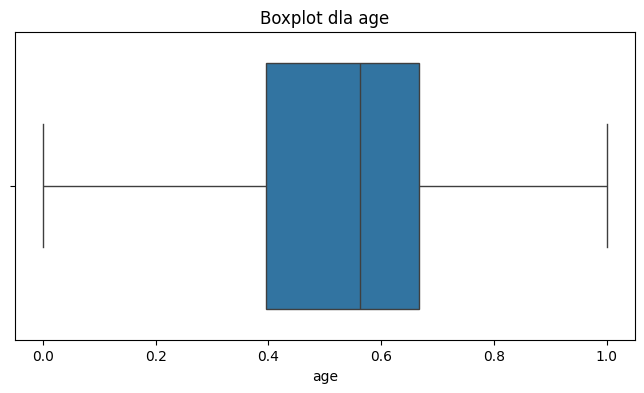

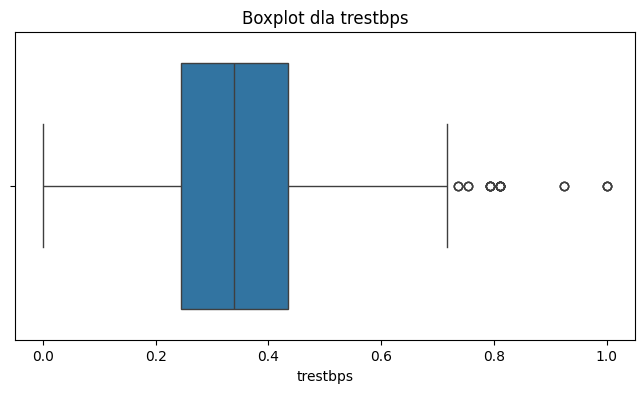

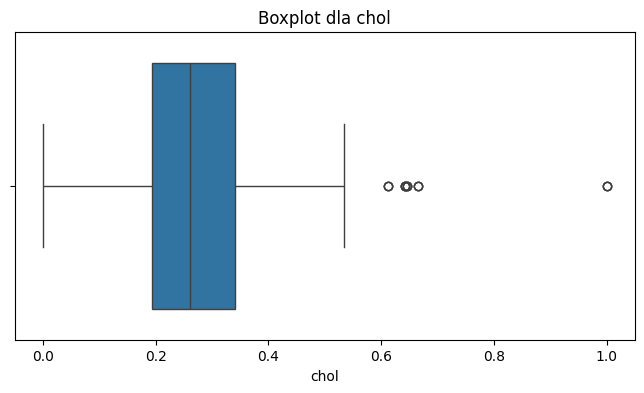

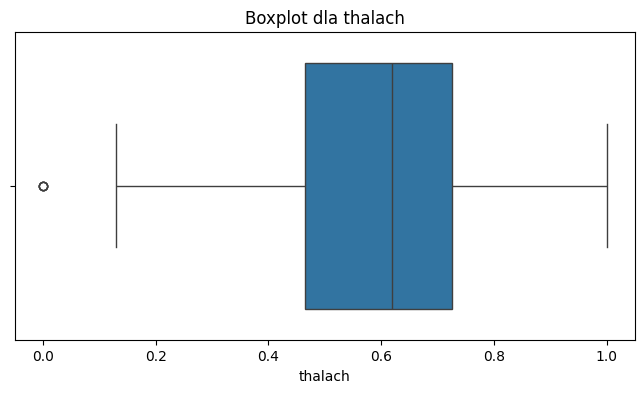

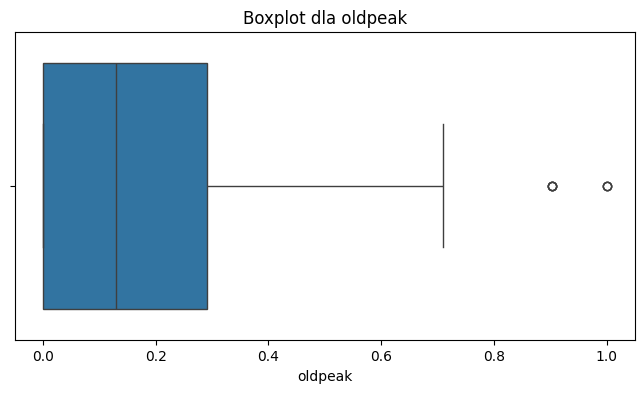

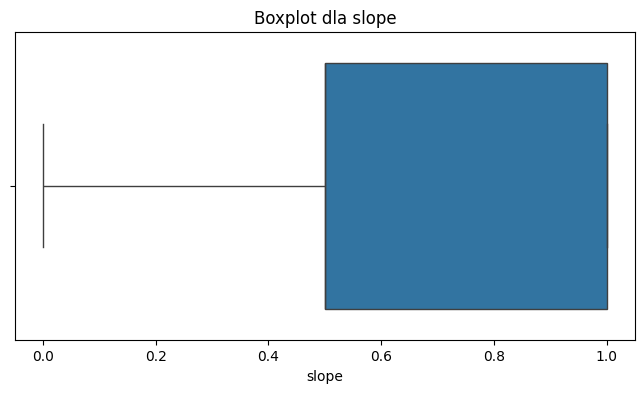

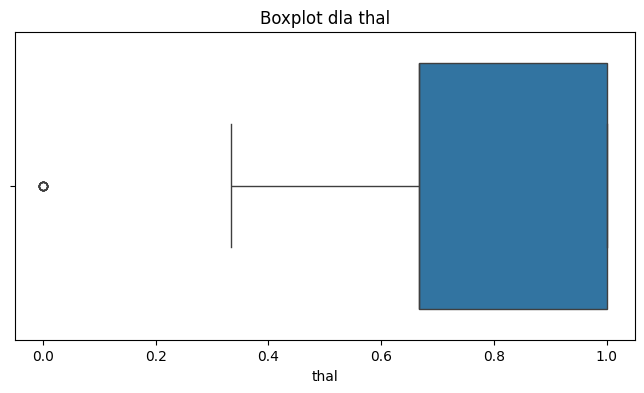

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'thal']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_fixed[col])
    plt.title(f'Boxplot dla {col}')
    plt.show()

In [40]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.7 * IQR
    upper_bound = Q3 + 1.7 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

for col in numeric_cols:
    outlier = detect_outliers_iqr(df_fixed, col)
    print(f'Outliers in {col}: {len(outlier)}')

Outliers in age: 0
Outliers in trestbps: 24
Outliers in chol: 16
Outliers in thalach: 4
Outliers in oldpeak: 7
Outliers in slope: 0
Outliers in thal: 7


In [41]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.7 * IQR
    upper_bound = Q3 + 1.7 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in numeric_cols:
    df_fixed = remove_outliers_iqr(df_fixed, col)

In [43]:
print("How many outlayers are left?: ")
for col in numeric_cols:
    outlier = detect_outliers_iqr(df_fixed, col)
    print(f'Outliers in {col}: {len(outlier)}')

How many outlayers are left?: 
Outliers in age: 0
Outliers in trestbps: 0
Outliers in chol: 0
Outliers in thalach: 0
Outliers in oldpeak: 0
Outliers in slope: 0
Outliers in thal: 0
